In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
dataset_path=r"M:/train"

In [7]:
ds=tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(224,224),
)


Found 5261 files belonging to 2 classes.


In [8]:
class_names=ds.class_names
print("Class names:", class_names)

Class names: ['0', '1']


In [9]:
from collections import Counter

label_counts=Counter()

for images,labels in ds:
    label_counts.update(labels.numpy())

for i, count in enumerate(label_counts.values()):
    print(class_names[i],":",count)

0 : 5000
1 : 261


In [10]:
for images, labels in ds.take(1):
    print("image shape:",images[0].shape)
    print("Type:",images[0].dtype)

image shape: (224, 224, 3)
Type: <dtype: 'float32'>


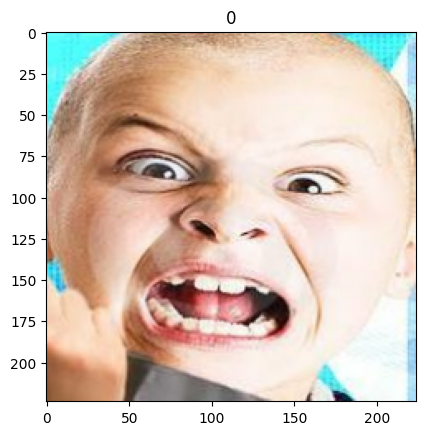

In [11]:
for images,labels in ds.take(1):
    plt.imshow(images[1].numpy().astype(np.uint8))
    plt.title(class_names[labels[i]])
    plt.show()
    break

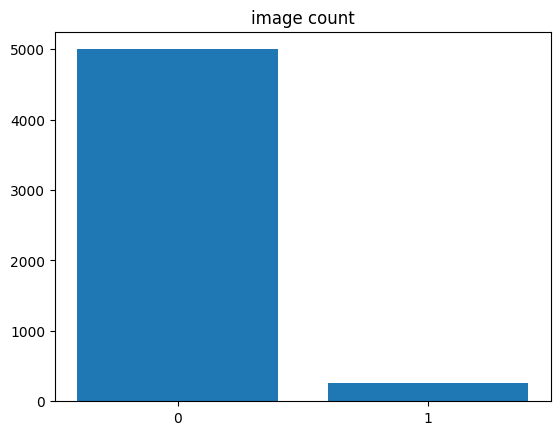

In [12]:
plt.bar(class_names, label_counts.values())
plt.title("image count")
plt.show()

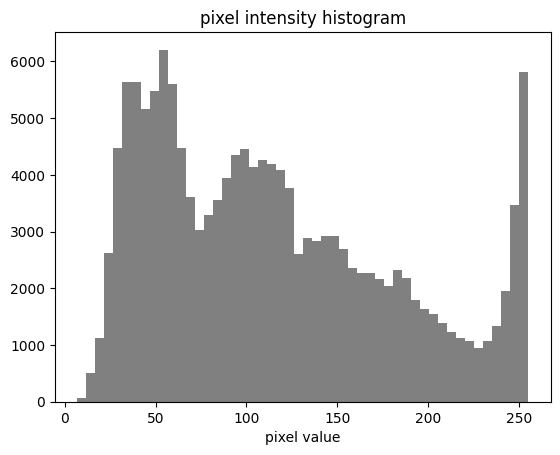

In [13]:
for images, labels in ds.take(1):
    pixels=images[0].numpy().astype(np.uint8).ravel()
    plt.hist(pixels, bins=50,color='gray')
    plt.title("pixel intensity histogram")
    plt.xlabel("pixel value")
    plt.show()
    break

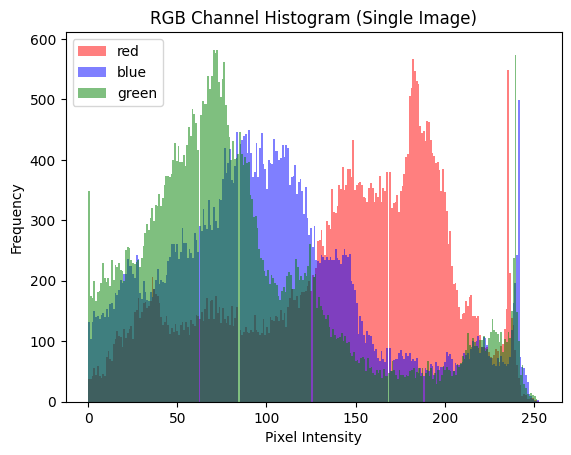

In [21]:
for images, labels in ds.take(1):
    img=images[0].numpy().astype(np.uint8)
    colors=['red','blue','green']
    for i, color in enumerate(colors):
        plt.hist(img[:,:,i].ravel(), bins=256,color=color.lower(),alpha=0.5)
    plt.title("RGB Channel Histogram (Single Image)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend(colors)
    plt.show()

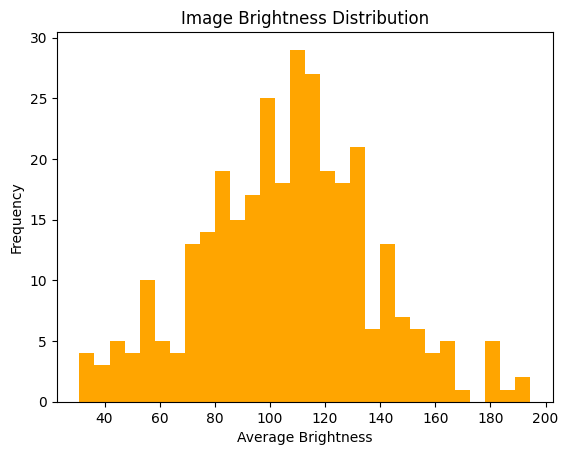

In [23]:
brightness_values = []

for images, _ in ds.take(10):  # Adjust batch or image count as needed
    for img in images:
        img_np = img.numpy().astype(np.uint8)
        brightness = np.mean(img_np)
        brightness_values.append(brightness)

plt.hist(brightness_values, bins=30, color='orange')
plt.title("Image Brightness Distribution")
plt.xlabel("Average Brightness")
plt.ylabel("Frequency")
plt.show()


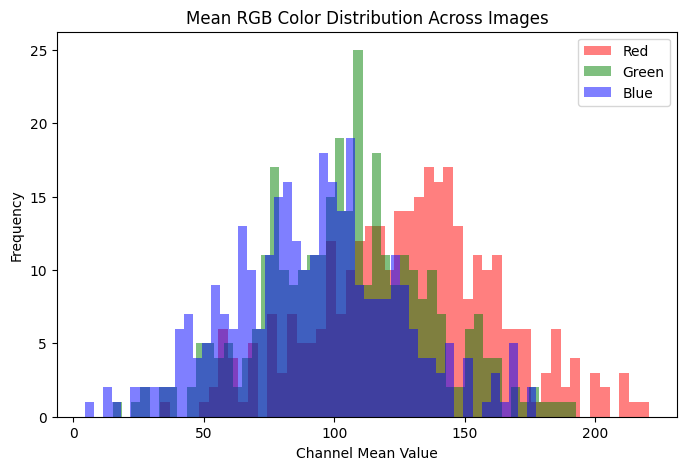

In [18]:
mean_colors = []

for images, _ in ds.take(10):
    for img in images:
        img_np = img.numpy().astype(np.uint8)
        mean_rgb = img_np.mean(axis=(0,1))  # mean for each channel
        mean_colors.append(mean_rgb)

mean_colors = np.array(mean_colors)
plt.figure(figsize=(8,5))
plt.hist(mean_colors[:, 0], bins=50, color='red', alpha=0.5, label='Red')
plt.hist(mean_colors[:, 1], bins=50, color='green', alpha=0.5, label='Green')
plt.hist(mean_colors[:, 2], bins=50, color='blue', alpha=0.5, label='Blue')
plt.title("Mean RGB Color Distribution Across Images")
plt.xlabel("Channel Mean Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


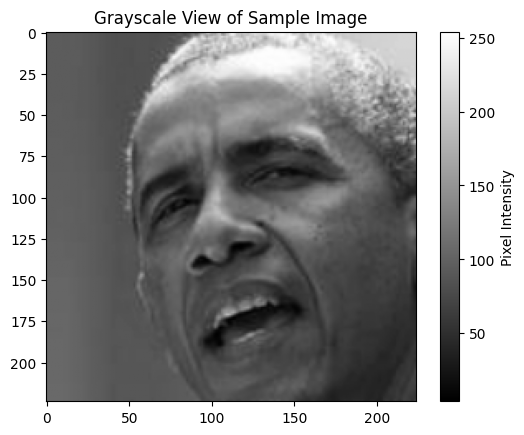

In [19]:
for images, _ in ds.take(1):
    img = images[0].numpy().astype(np.uint8)
    gray = np.mean(img, axis=2).astype(np.uint8)  # simple mean for RGB to gray

    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale View of Sample Image")
    plt.colorbar(label='Pixel Intensity')
    plt.show()
    break


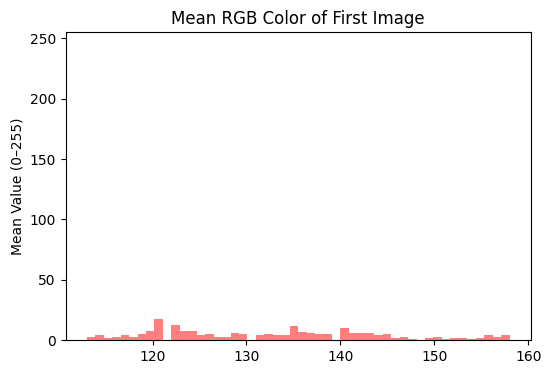

In [30]:
import matplotlib.pyplot as plt
import numpy as np

for img, _ in ds.take(1):
    img = img.numpy().astype(np.uint8)
    mean = img_np.mean(axis=(0, 1)).astype(np.uint8)

# Bar chart for RGB channels
plt.figure(figsize=(6, 4))
plt.hist(mean_colors[:, 0], bins=50, color='red', alpha=0.5, label='Red')

plt.title("Mean RGB Color of First Image")
plt.ylabel("Mean Value (0–255)")
plt.ylim(0, 255)
plt.show()
